# CUSTOMER SENTIMENT ANALYSIS

- Customer Sentiment Analysis refers to the range of feelings; both good and bad, that your clients experience as they interact with your product, service or brand.
- The reasons as to why customer sentiment analysis is important includes the following;
##### 1. Brand Reputation
Monitoring sentiment analysis can help your company mitigate negative PR from spiralling 
#### 2. Improved Products and Services
Sentiment analysis can help in trend prediction, market research, and figuring out why product releases failed.
When you're trying to break into a new market, when you're launching new products, or when you're changing your current ones, these recommendations might be useful.
#### 3. Exceptional Customer Service
The number one reason why customer service is important in a business is because it correlates to revenue: 84% of organizations working to improve customer service report an increase in revenue.

In [ ]:
##Libraries to be used

In [49]:
import snscrape.modules.twitter as sntwitter
import pandas as pd 
import matplotlib.pyplot as plt

In [16]:
# search words
query = '"lang:en" "since:2021-12-01" Zuku OR ZukuAmazing'
tweets = [] #empty list to append tweets
limit = 25000
count=0

In [17]:
for tweet in sntwitter.TwitterSearchScraper(query).get_items():
    count += 1 # to see tweet scraping process 
    
    if len(tweets) == limit:
        break
    else:
        # append necessary attributes to empty list
        tweets.append ([tweet.date, tweet.content, tweet.user.username, 
        tweet.user.location, tweet.retweetCount, tweet.likeCount, tweet.sourceLabel, tweet.coordinates])
        print('Number ', count, ':success')

# turn tweet list into a dataframe
df = pd.DataFrame(tweets, columns=['date','text','username','location','retweetcount','likecount','source','coordinates'])

# convert dataframe into csv file
df.to_csv('ZUKU22.csv', index=False)

Number  1 :success
Number  2 :success
Number  3 :success
Number  4 :success
Number  5 :success
Number  6 :success
Number  7 :success
Number  8 :success
Number  9 :success
Number  10 :success
Number  11 :success
Number  12 :success
Number  13 :success
Number  14 :success
Number  15 :success
Number  16 :success
Number  17 :success
Number  18 :success
Number  19 :success
Number  20 :success
Number  21 :success
Number  22 :success
Number  23 :success
Number  24 :success
Number  25 :success
Number  26 :success
Number  27 :success
Number  28 :success
Number  29 :success
Number  30 :success
Number  31 :success
Number  32 :success
Number  33 :success
Number  34 :success
Number  35 :success
Number  36 :success
Number  37 :success
Number  38 :success
Number  39 :success
Number  40 :success
Number  41 :success
Number  42 :success
Number  43 :success
Number  44 :success
Number  45 :success
Number  46 :success
Number  47 :success
Number  48 :success
Number  49 :success
Number  50 :success
Number  5

In [100]:
df = pd.read_csv('ZUKU22.csv')
df.head(10)

,date,text,username,location,retweetcount,likecount,source,coordinates
0,2022-10-27 09:22:35+00:00,@Cmoe34 @ZUKUVERSE can i get a wl spot pls sir...,MariaPinkwolf,NaN,0,0,Twitter Web App,NaN
1,2022-10-27 09:21:47+00:00,"@AdvoBarryRoux Once dated this chick, during t...",shepherd_ncube7,"In the EVST, Nowhere 📌",0,0,Twitter for iPhone,NaN
2,2022-10-27 09:04:33+00:00,@sharkofchaos Right thats wat im saying... Oh ...,Killix32,NaN,0,0,Twitter for Android,NaN
3,2022-10-27 09:02:16+00:00,sorry if i post a lot https://t.co/CVfwAOnyLf,SHlZUKU8,culoboyo —,5,84,Twitter for iPhone,NaN
4,2022-10-27 08:51:49+00:00,"#GenshinImpact \nImagine we get to Snezhnaya, ...",JinkoZuku,NaN,0,0,Twitter Web App,NaN
5,2022-10-27 08:47:57+00:00,@ZukuAmazing for the 3rd time i am complaining...,junior_onyango,Kapedo Valley Kenya,0,2,Twitter for iPhone,NaN
6,2022-10-27 08:20:53+00:00,@ZukuAmazing How long till this is resolved?,be_lish,"Nairobi, Kenya",0,1,Twitter for iPhone,NaN
7,2022-10-27 08:11:37+00:00,@polo_kimani Zuku gives them free. You only pa...,samuelkataka,"Nairobi, Kenya",0,0,Twitter for Android,NaN
8,2022-10-27 08:09:29+00:00,@ZukuAmazing Very well. Thank you.,DanClah,25Flow...,0,0,Twitter for Android,NaN
9,2022-10-27 08:09:24+00:00,@MatosandGames A samedi 😉,Zuku_nkts,NaN,0,0,Twitter for Android,NaN


In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   date          25000 non-null  object
 1   text          25000 non-null  object
 2   username      25000 non-null  object
 3   location      15318 non-null  object
 4   retweetcount  25000 non-null  int64 
 5   likecount     25000 non-null  int64 
 6   source        25000 non-null  object
 7   coordinates   662 non-null    object
dtypes: int64(2), object(6)
memory usage: 1.5+ MB


In [74]:
sum(df.duplicated()) #for duplicate values

0

In [75]:
# Replace Nulls in 'Location' to 'Unknown'
df['location']=df['location'].fillna('Unknown')

In [76]:
# Change date into appropriate datatype
df['date'] = pd.to_datetime(df['date'])

In [77]:
del df['coordinates']

In [78]:
import re # for regular expressions 

In [79]:
def cleanText(text):
    text = text.lower()
    emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags=re.UNICODE)

    text = re.sub('\@\w+|\#\w+|\d+','',text) # Remove @mentions
    text = re.sub('http(s?)(:?)\/\/\S+','', text) # Removing the hyper link
    text = re.sub('#','',text)  # Removing the # symbols
    text = re.sub(':','',text)  # Removing the : symbols
    text = re.sub('\"','',text) # Removing the " symbols
    text = re.sub('\Ã¢Â€Â','',text) # Removing the Ã¢Â€Â symbols
    text = re.sub('\Ã¢Â€Âœ','',text) # Removing the Ã¢Â€Âœ symbols
    text = re.sub('\Ã¢Â€Â™','',text) # Removing the Ã¢Â€Â™ symbols
    text = re.sub('\/','',text) # Removing the / symbols
    text = re.sub('\|','',text) # Removing the | symbols
    text = re.sub('\?','',text) # Removing the ? symbols
    text = re.sub('\.','',text) # Removing the . symbols
    text = re.sub('\,','',text) # Removing the , symbols
    text = re.sub('\!','',text) # Removing the ! symbols
    text = re.sub('@','',text) # Removing the @ symbols
    text = re.sub('\'','',text) # Removing the ' symbols
    text = re.sub('\\n','',text) # Removing the \n symbols
    text = re.sub('\\r','',text) # Removing the \r symbols
    text = re.sub('\*','',text) # Removing the * symbols
    text = emoji_pattern.sub('', text) # Removing emoji patterns
    return text

df['cleaned_text'] = df['text'].apply(cleanText)
df['location'] = df['location'].apply(cleanText)

In [80]:
df.head(6)

,date,text,username,location,retweetcount,likecount,source,cleaned_text
0,2022-10-27 09:22:35+00:00,@Cmoe34 @ZUKUVERSE can i get a wl spot pls sir...,MariaPinkwolf,unknown,0,0,Twitter Web App,can i get a wl spot pls sir i would love to ...
1,2022-10-27 09:21:47+00:00,"@AdvoBarryRoux Once dated this chick, during t...",shepherd_ncube7,in the evst nowhere,0,0,Twitter for iPhone,once dated this chick during the breakup proc...
2,2022-10-27 09:04:33+00:00,@sharkofchaos Right thats wat im saying... Oh ...,Killix32,unknown,0,0,Twitter for Android,right thats wat im saying oh no wat bout ofa ...
3,2022-10-27 09:02:16+00:00,sorry if i post a lot https://t.co/CVfwAOnyLf,SHlZUKU8,culoboyo —,5,84,Twitter for iPhone,sorry if i post a lot
4,2022-10-27 08:51:49+00:00,"#GenshinImpact \nImagine we get to Snezhnaya, ...",JinkoZuku,unknown,0,0,Twitter Web App,imagine we get to snezhnaya become accused ag...
5,2022-10-27 08:47:57+00:00,@ZukuAmazing for the 3rd time i am complaining...,junior_onyango,kapedo valley kenya,0,2,Twitter for iPhone,for the rd time i am complaining here whats w...


## Using TextBlob to Measure Polarity

In [81]:
from textblob import TextBlob

In [82]:
TextBlob("Whats wrong with my network connection acc").sentiment.polarity

-0.5

In [83]:
df.isna().sum() #to get the sum of missing values

date            0
text            0
username        0
location        0
retweetcount    0
likecount       0
source          0
cleaned_text    0
dtype: int64

In [84]:
df.dropna(inplace=True) #dropping all null values

In [85]:
polarity = []

for i in df ["cleaned_text"]:
    polarity.append(TextBlob(i).sentiment.polarity)

In [86]:
df["polarity"] = polarity

In [87]:
df.head(11)

,date,text,username,location,retweetcount,likecount,source,cleaned_text,polarity
0,2022-10-27 09:22:35+00:00,@Cmoe34 @ZUKUVERSE can i get a wl spot pls sir...,MariaPinkwolf,unknown,0,0,Twitter Web App,can i get a wl spot pls sir i would love to ...,0.500000
1,2022-10-27 09:21:47+00:00,"@AdvoBarryRoux Once dated this chick, during t...",shepherd_ncube7,in the evst nowhere,0,0,Twitter for iPhone,once dated this chick during the breakup proc...,-0.095833
2,2022-10-27 09:04:33+00:00,@sharkofchaos Right thats wat im saying... Oh ...,Killix32,unknown,0,0,Twitter for Android,right thats wat im saying oh no wat bout ofa ...,-0.096429
3,2022-10-27 09:02:16+00:00,sorry if i post a lot https://t.co/CVfwAOnyLf,SHlZUKU8,culoboyo —,5,84,Twitter for iPhone,sorry if i post a lot,-0.500000
4,2022-10-27 08:51:49+00:00,"#GenshinImpact \nImagine we get to Snezhnaya, ...",JinkoZuku,unknown,0,0,Twitter Web App,imagine we get to snezhnaya become accused ag...,-0.200000
5,2022-10-27 08:47:57+00:00,@ZukuAmazing for the 3rd time i am complaining...,junior_onyango,kapedo valley kenya,0,2,Twitter for iPhone,for the rd time i am complaining here whats w...,-0.116667
6,2022-10-27 08:20:53+00:00,@ZukuAmazing How long till this is resolved?,be_lish,nairobi kenya,0,1,Twitter for iPhone,how long till this is resolved,-0.050000
7,2022-10-27 08:11:37+00:00,@polo_kimani Zuku gives them free. You only pa...,samuelkataka,nairobi kenya,0,0,Twitter for Android,zuku gives them free you only pay subscription,0.200000
8,2022-10-27 08:09:29+00:00,@ZukuAmazing Very well. Thank you.,DanClah,flow,0,0,Twitter for Android,very well thank you,0.200000
9,2022-10-27 08:09:24+00:00,@MatosandGames A samedi 😉,Zuku_nkts,unknown,0,0,Twitter for Android,a samedi,0.000000


In [95]:
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

def getSentimentTextBlob(polarity):
    if polarity < 0:
        return "Negative"
    else:
        return "Positive"

In [96]:
# Applying the functions to respective columns
df['polarity'] = df['cleaned_text'].apply(getPolarity)
df['Sentiment'] = df['polarity'].apply(getSentimentTextBlob)


In [97]:
df.sample(3)

,date,text,username,location,retweetcount,likecount,source,cleaned_text,polarity,Sentiment
11353,2022-08-26 09:03:17+00:00,@ZukuAmazing account 216384 no internet,Rmuchiri,awesometown,0,0,Twitter for Android,account no internet,0.00,Positive
3492,2022-10-05 17:08:50+00:00,@ZukuAmazing Thank you for this.\nHow long wi...,ThisIsMuriira,unknown,0,0,Twitter for Android,thank you for thishow long will the construc...,-0.05,Negative
6185,2022-09-21 04:21:49+00:00,@1d10t_zuku Let me go,drxco_love,riding you,0,0,Twitter for iPhone,let me go,0.00,Positive


In [98]:
df['Sentiment'].value_counts()

Positive    19815
Negative     5185
Name: Sentiment, dtype: int64

# Negative Comment Analysis

In [36]:
df_negative = df[df["polarity"] == -1]

In [38]:
total_df = ''.join (df_negative["cleaned_text"])

In [43]:
from wordcloud import WordCloud, STOPWORDS

In [45]:
stopwords = set(STOPWORDS)

In [60]:
wordcloud = WordCloud(width = 5000, height = 5000, stopwords = stopwords, random_state = 1, colormap= 'Set1', collocations = False).generate(total_df)

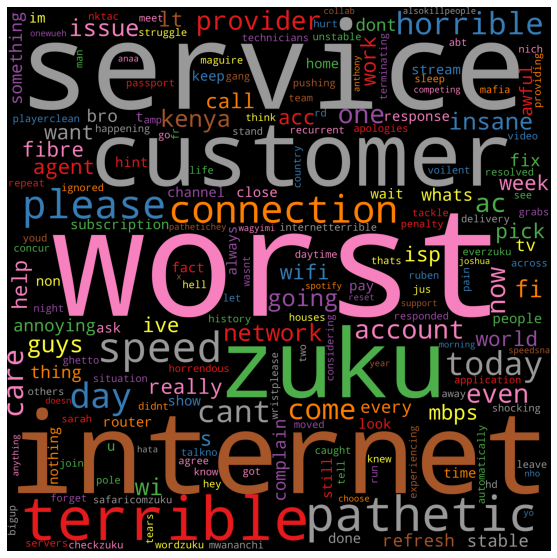

In [61]:
plt.figure(figsize = (10,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.savefig("zuku.png", format="png")

- From the above figure, we can clearly see that the most common negative words are "WORST, CUSTOMER, SERVICE, INTERNET, PATHETIC, TERRIBLE"
- The bigger the size of the word, the bigger the polarity it has

## Positive Comment Analysis

In [88]:
df_positive = df[df["polarity"] ==1]

In [89]:
''.join (df_positive["cleaned_text"])

' because adobo is delicious i found this in the  discord looks awesomepixel leon is best leonakian bc theyre best friends mafurui are best friends its canon bc i said it sunday entertainment is set its a line-up of all the best shows from during the week and it is looking greatonly on  today from am wat  am catazam  zuku  airtel tv e-networks glo tv boy best friend elijah riley montefalco i cant believe how perfect the movie wasit was perfect perfect best feeling ghostie zuku is the best \U0001f979 thank you apology camei felt like hugging katsuki when he saw that now izuku is so close yet so fari felt elated at dbdks weddingi felt like having tea with yagi in izukus stead and talk about how wonderful izuku isi wanted to cradle by baby zuku in my armsi wanted to slap hisashi zuku is the best 🤩     best customer care service i have received this year called  about issues with my home fiber guys promised to send technicians to come sort it within  hrs and then sent me  gb mobile data to

In [92]:
total_df = ''.join (df_positive["cleaned_text"])

In [93]:
wordcloud = WordCloud(width = 5000, height = 5000, stopwords = stopwords, random_state = 1, colormap= 'Set1', collocations = False).generate(total_df)

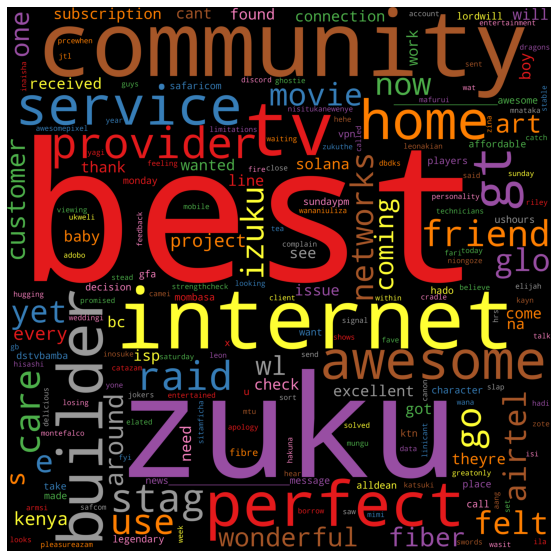

In [94]:
plt.figure(figsize = (10,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.savefig("zuku.png", format="png")

- From the above figure, the most positive words are "BEST, INTERNET, ZUKU, PERFECT"

In [99]:
# Exported data to Excel to get Latitude and Longitude for Tableau Visualization.
df.to_csv('df_Zuku_Main.csv',encoding='utf-8-sig', index=False)